Regresión Lineal
===

* 12:08 min | Ultima modificación: Abril 13, 2021 | [YouTube](https://youtu.be/4IrCKOJ5m-A)

## Descripción del problema

Se desea construir un modelo que permita pronósticar el valor de $y$ a partir del valor de $x$. Se tiene un conjunto de 30 observaciones para construir el modelo de pronóstico.

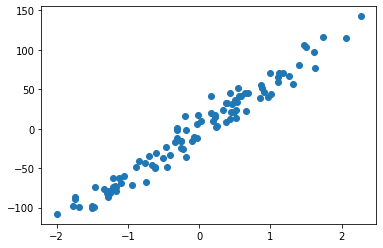

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, d = make_regression(
    n_samples=100,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=12.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion 
    random_state=12136)    #

plt.scatter(X, d);

## Modelo de regresión lineal

En un modelo de regresión, la variable dependiente $y$ es una función lineal de las variables independientes $x_i$, tal que:


$$y = w_0 + \sum_{i=1}^N w_i * x_i + e$$


Donde: 


* $y$ es la variable explicada.


* $x_i$ es la $i$-ésima variable explicativa del comportamiento de $y$.


* $w_0$ es el intercepto del modelo.


* $w_i$ es el coeficiente de $x_i$.


* $e$ es el error del modelo. Se parte del supuesto de que siguiendo una distribución normal con media cero y varianza $\sigma^2$ constante y desconocida.

## Estimación

En la siguiente figura se presenta de forma general la regresión de $y_p = e + w_0 + w_1 * x_p$ para $p$ = 1, ..., 5. Los puntos negros representan los datos (las observaciones), y la línea negra representa la ecuación de regresión. Las líneas rojas representan el error $e$ entre el valor observado de $y_p$ y el pronósticado por el modelo para cada valor  $x_p$. 

![assets/regxy.jpg](assets/regxy.jpg) 

La estimación de los parámetros $w_i$ del modelo se realiza por mínimos cuadrados ordinarios (OLS), o lo que es lo mismo, minimizando la suma de los errores al cuadrado (SSE)

$$\text{SSE} = \sum_{p=1}^P e_p^2$$

Esto es, se deben encontrar los valores de $w_i$ que minimicen:

$$\text{SSE} =\sum_{p=1}^P \left( y_p - w_0 - \sum_i^N w_i x_{p,i} \right)^2$$

para los $P$ patrones de ejemplo.

La estimación de los parámetros del modelo minimizando el SSE supone que los errores siguen una distribución normal con media cero y varianza finita y constante. 

**Actividad.---** Estime los parámetros del modelo de regresión usando el Solver de Microsoft Excel.

## Especificación

A continuación se realiza la estimación del modelo usando Python

In [2]:
#
# Se usa la función LinearRegresion() para 
# estimar el modelo de regresión lineal.
#
from sklearn.linear_model import LinearRegression


# Crea el modelo
linearRegression = LinearRegression(
    fit_intercept=True,               # ?intercepto (w0)
    normalize=False,                  # solo para fit_intercept == False
    copy_X=True                       # copia X o lo sobreescribe
)

## Entrenamiento

In [3]:
# Calibra el modelo
linearRegression.fit(X, d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# Imprime los coeficientes
print('Coeficientes: ', linearRegression.coef_)

# Imprime el intercepto
print('Intercepto: ', linearRegression.intercept_)

Coeficientes:  [59.27425921]
Intercepto:  -0.3900321834949718


## Pronóstico

In [5]:
import pandas as pd


df = pd.DataFrame(X, columns = ['x'])
df['d'] = d
df['y_pred'] = linearRegression.predict(X)
df

,x,d,y_pred
0,-0.075482,-10.578417,-4.864184
1,0.254580,3.454003,14.699995
2,-1.677905,-99.604299,-99.846584
3,0.029345,9.184315,1.349368
4,-1.260155,-78.670116,-75.084778
...,...,...,...
95,-1.251230,-81.934639,-74.555751
96,1.501635,103.842457,88.618274
97,0.512642,24.328431,29.996461
98,0.172236,19.723802,9.819109


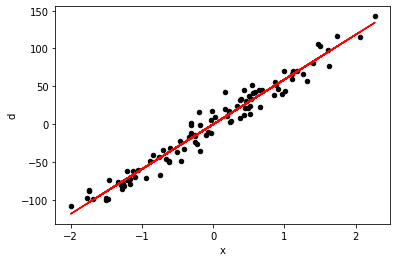

In [6]:
#
# Gráfico del pronóstico
#
df.plot.scatter('x', 'd', color='black');
plt.plot(df[['x']].values, df.y_pred, color='red');

## Efecto del ruído cuando hay pocos datos

Cuando existen pocos datos, la estimación del modelo es altamente sensible a los datos usados para su ajuste. En la figura de abajo, se tiene los datos sin ruido (puntos rojos) y la predicción de varios modelos lineales que difieren en los datos de entrenamiento; para variar los datos, se tomaron los valores de $X$ de los puntos rojos y se adicionó ruido aleatorio. Una vez se estimó el nuevo modelo se procedio a graficar su predicción (líneas grises). Como se observa, pequeñas variaciones en $X$ causan cambios muy importantes en el modelo estimado y consecuentemente cambios no despeciables en los pronósticos realizados.

![assets/lm-1.jpg](assets/lm-1.jpg)

## Efecto de outliers

Uno de los principales problemas de la regresión lineal es el efecto de los outliers. En la figura de abajo se presenta la recta de regresión lineal estimada para una muestra de diez puntos. En ella se observa que la recta de regresión sigue la tendencia de los puntos.

![assets/lm-2.jpg](assets/lm-2.jpg)

En la siguiente figura se presenta el mismo caso anterior, pero se adicionó un punto en las coordenadas (0, 1), que corresponde a un outlier. En la figura que sigue se observa como la recta de regresión gira hacia el punto.

![assets/lm-3.jpg](assets/lm-3.jpg)

Esto se debe a que en la estimación de los parámetros del modelo de regresión lineal se minimiza la suma de errores al cuadrado:

$$\text{SSE} =\sum_{i=1}^N (y_i - w_0 - w_1 x_i)^2$$

la cual se ve influenciada por valores del error muy grandes, como en el caso de los outliers.

Para resolver este problema, los parámetros del modelo pueden ser estimados minimizando otras medidas de error, como por ejemplo, la desviación media absoluta:

$$\text{MAD} = \frac{1}{N} \sum_{i=1}^N |y_i - w_0 - w_1 x_i|$$

**Actividad.---** Estime nuevamente el modelo minimizando la desviación media absoluta.